Entrega: La entrega de este examen se realizará a traves del git hub.

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





In [136]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

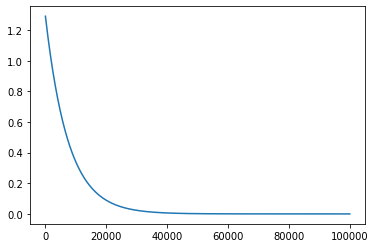

In [137]:
def fun(y):
  return 1.29*np.exp(-y/7482.2)
 
y= np.linspace(0,100000,1000)
plt.plot(y, fun(y))

In [138]:
#Solucion a la EDO
def pos(cond_ini, t, parametros):
  h, v = cond_ini
  m, g, A, lam, delta = parametros
  k0 = 0.5*A*1.29*delta
  A = [v, -m*g + k0*(v**2)*np.exp(-h/lam) ]
  return A

t = np.linspace(0,300,1500)

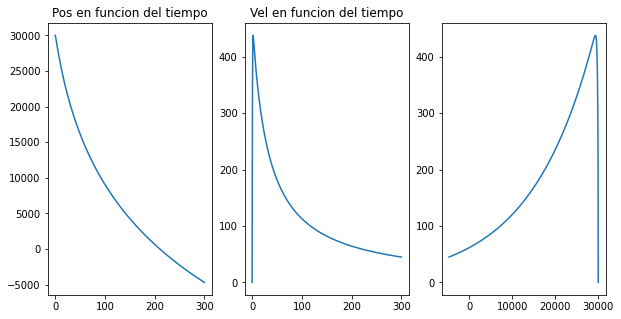

In [139]:
#Condiciones 1
v0, h0 = 0,30*1000
m, g, A, lam, delta = 60, 9.8, 0.3, 7482.2, 0.8
cond_ini = [h0, v0]
parametros = [m, g, A, lam, delta]
solutions = integrate.odeint(pos, cond_ini, t, args = (parametros, ) ) 
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(t, solutions[:,0])
ax[0].set_title('Pos en funcion del tiempo')
ax[1].plot(t, -solutions[:,1])
ax[1].set_title('Vel en funcion del tiempo')
ax[2].plot(solutions[:,0], -solutions[:,1])
xmax1= max(-solutions[:,1])


In [156]:
k0=1.29*3*0.8*0.5
def vlim(m):
  return np.sqrt(m*9.8/1548)

y= np.linspace(0,10000,10000)
vl1= vlim(30)
vl2= vlim(40)
vl3= vlim(50)
vl4= vlim(60)
vl5= vlim(70)

def vmax(vl,x_m):
  return vl/np.sqrt(np.exp(-x_m/7482.2))

x1= np.linspace(0,xmax1,100)


vmax1= vmax(vl1,xmax1)*1000
print("Vel Máx con la primera condición:",vmax1,"m/s")


Vel Máx con la primera condición: 448.73726087322154 m/s


Vel Máx con la segunda condición: 530.7704914604877 m/s


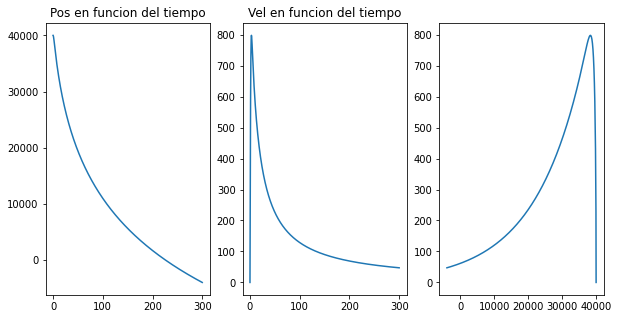

In [151]:
#Condiciones 2
v0, h0 = 0,40*1000
m, g, A, lam, delta = 60, 9.8, 0.3, 7482.2, 0.8
cond_ini = [h0, v0]
parametros = [m, g, A, lam, delta]
solutions = integrate.odeint(pos, cond_ini, t, args = (parametros, ) ) 
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(t, solutions[:,0])
ax[0].set_title('Pos en funcion del tiempo')
ax[1].plot(t, -solutions[:,1])
ax[1].set_title('Vel en funcion del tiempo')
ax[2].plot(solutions[:,0], -solutions[:,1])
xmax2=max(-solutions[:,1])

vmax2= vmax(vl2,xmax2)*1000
print("Vel Máx con la segunda condición:",vmax2,"m/s")

Vel Máx con la segunda condición: 615.9759788756178 m/s


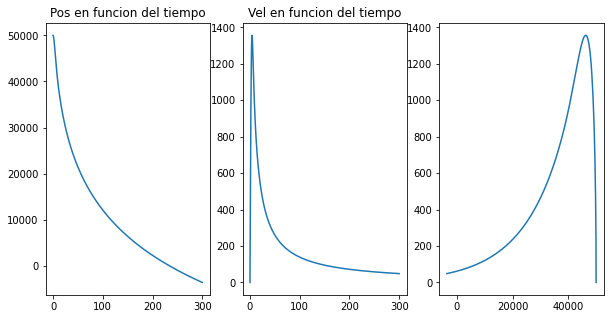

In [142]:
#Condiciones 3
v0, h0 = 0,50*1000
m, g, A, lam, delta = 60, 9.8, 0.3, 7482.2, 0.8
cond_ini = [h0, v0]
parametros = [m, g, A, lam, delta]
solutions = integrate.odeint(pos, cond_ini, t, args = (parametros, ) ) 
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(t, solutions[:,0])
ax[0].set_title('Pos en funcion del tiempo')
ax[1].plot(t, -solutions[:,1])
ax[1].set_title('Vel en funcion del tiempo')
ax[2].plot(solutions[:,0], -solutions[:,1])

xmax3=max(-solutions[:,1])

vmax3= vmax(vl3,xmax3)*1000
print("Vel Máx con la segunda condición:",vmax3,"m/s")


Vel Máx con la segunda condición: 709.2830433509436 m/s


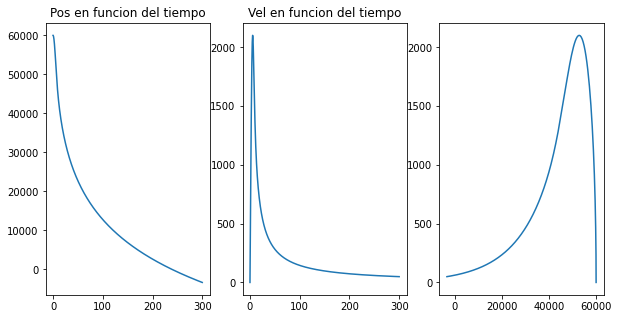

In [143]:
#Condiciones 4
v0, h0 = 0,60*1000
m, g, A, lam, delta = 60, 9.8, 0.3, 7482.2, 0.8
cond_ini = [h0, v0]
parametros = [m, g, A, lam, delta]
solutions = integrate.odeint(pos, cond_ini, t, args = (parametros, ) ) 
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(t, solutions[:,0])
ax[0].set_title('Pos en funcion del tiempo')
ax[1].plot(t, -solutions[:,1])
ax[1].set_title('Vel en funcion del tiempo')
ax[2].plot(solutions[:,0], -solutions[:,1])

xmax4=max(-solutions[:,1])

vmax4= vmax(vl4,xmax4)*1000
print("Vel Máx con la segunda condición:",vmax4,"m/s")

Vel Máx con la segunda condición: 811.5281970698389 m/s


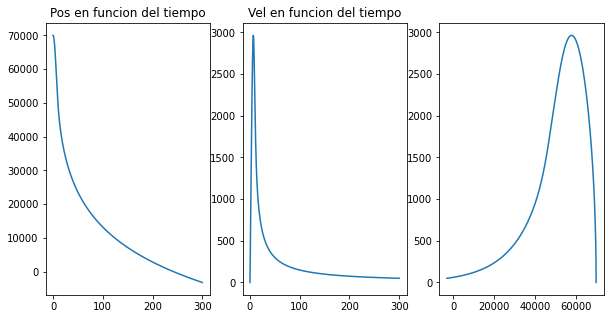

In [144]:
#Condiciones 5
v0, h0 = 0,70*1000
m, g, A, lam, delta = 60, 9.8, 0.3, 7482.2, 0.8
cond_ini = [h0, v0]
parametros = [m, g, A, lam, delta]
solutions = integrate.odeint(pos, cond_ini, t, args = (parametros, ) ) 
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(t, solutions[:,0])
ax[0].set_title('Pos en funcion del tiempo')
ax[1].plot(t, -solutions[:,1])
ax[1].set_title('Vel en funcion del tiempo')
ax[2].plot(solutions[:,0], -solutions[:,1])

xmax5=max(-solutions[:,1])

vmax5= vmax(vl5,xmax5)*1000
print("Vel Máx con la segunda condición:",vmax5,"m/s")

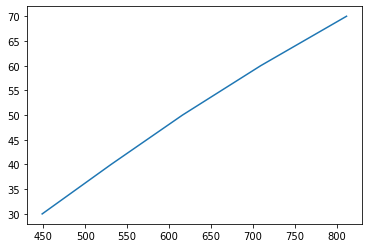

In [161]:
#SOL.Velocidad Máxima
vmax= [vmax1,vmax2,vmax3,vmax4,vmax5]
hcaida= [30,40,50,60,70]

plt.plot(vmax,hcaida)

